## Accuracy of Spline interpolation's piecewise functions (based on derivatives)

We have looked at accuracies of interpolations based on graphical comparison before. Same things can be captured by looking into accuracies in terms of derivatives as they tell the functions rate at a certain point.

In the given example below, we will showcase Spline's ability to approximate the derivative of a true function at a specific point in a solid level.

Error in First Derivative: [2.66453526e-15 8.88178420e-16 1.77635684e-15 1.77635684e-15
 3.55271368e-15 7.10542736e-15 3.55271368e-15 1.42108547e-14
 3.55271368e-14 1.42108547e-13]
Error in Second Derivative: [1.42108547e-14 0.00000000e+00 4.44089210e-15 7.10542736e-15
 2.66453526e-14 8.88178420e-14 4.97379915e-14 6.75015599e-14
 1.13686838e-13 7.60280727e-13]


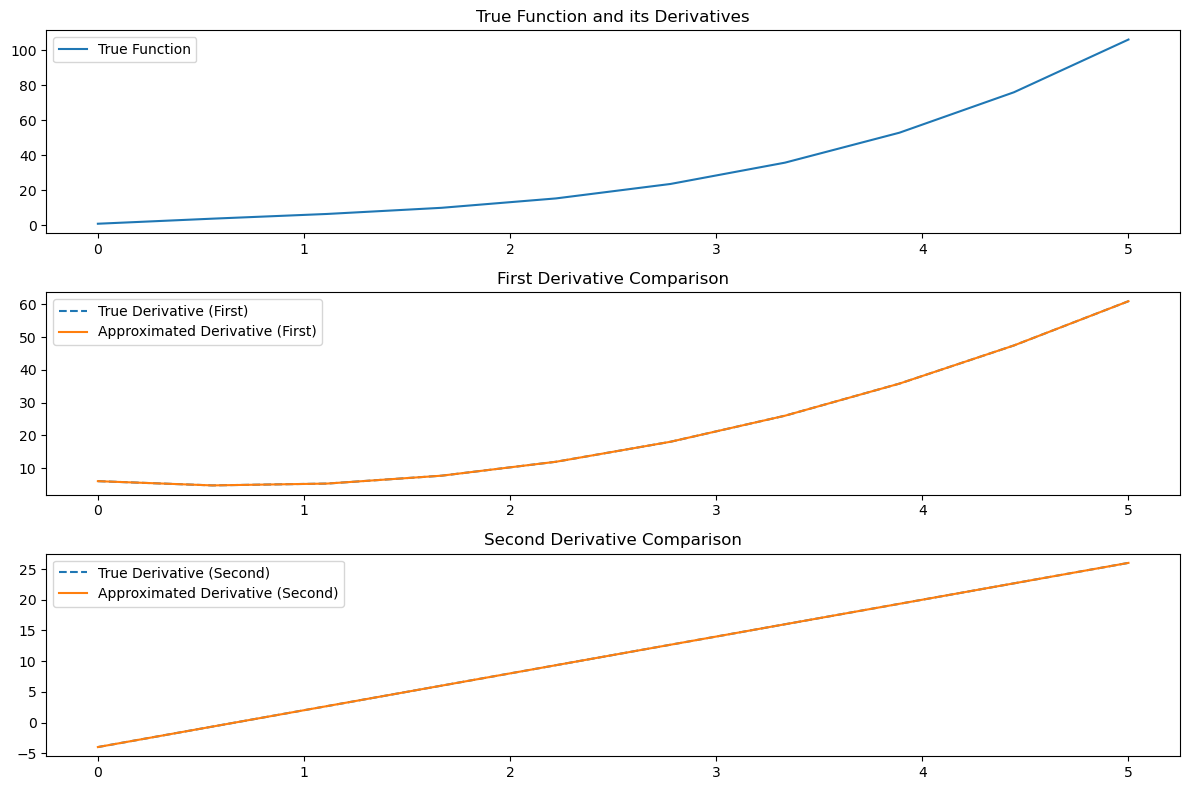

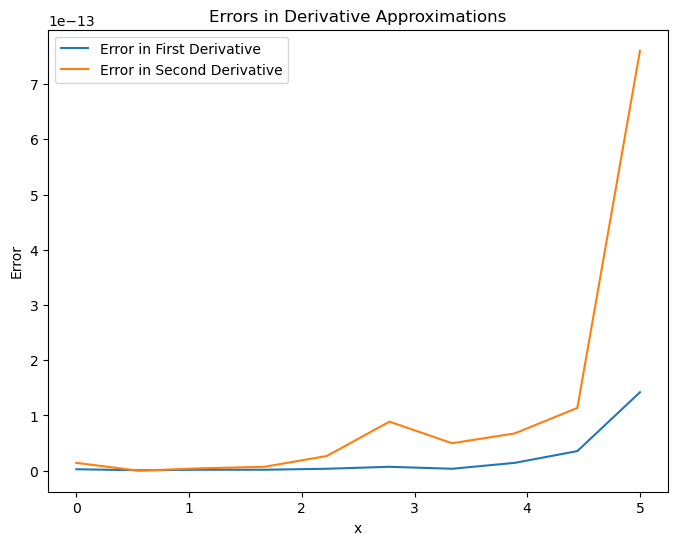

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Step 1: Select Equally Distant Grid
start = 0
end = 5
num_points = 10
x_points = np.linspace(start, end, num_points)

# Step 2: Define True Function and Evaluate
def true_function(x):
    return x**3 - 2*x**2 + 6*x + 1

def true_derivative_1(x): 
    return 3*x**2-4*x+6  

def true_derivative_2(x):
    return 6*x-4

y_points_true = true_function(x_points)    #true function and derivative values
y_prime_true = true_derivative_1(x_points)
y_double_prime_true = true_derivative_2(x_points)

# Step 3: Perform Spline Interpolation
cs = CubicSpline(x_points, y_points_true)

# Step 4: Calculate First and Second Derivatives from Spline
y_prime_approx = cs.derivative(nu=1)(x_points)
y_double_prime_approx = cs.derivative(nu=2)(x_points)

# Step 6: Compare Approximated vs True Derivatives
error_prime = np.abs(y_prime_true - y_prime_approx)
error_double_prime = np.abs(y_double_prime_true - y_double_prime_approx)

# Print or plot the results
print("Error in First Derivative:", error_prime)
print("Error in Second Derivative:", error_double_prime)


# Plot the results
plt.figure(figsize=(12, 8))

# Plot the true function and its derivatives
plt.subplot(3, 1, 1)
plt.plot(x_points, y_points_true, label='True Function')
plt.title('True Function and its Derivatives')
plt.legend()

# Plot the true and approximated first derivatives
plt.subplot(3, 1, 2)
plt.plot(x_points, y_prime_true, label='True Derivative (First)', linestyle='dashed')
plt.plot(x_points, y_prime_approx, label='Approximated Derivative (First)')
plt.title('First Derivative Comparison')
plt.legend()

# Plot the true and approximated second derivatives
plt.subplot(3, 1, 3)
plt.plot(x_points, y_double_prime_true, label='True Derivative (Second)', linestyle='dashed')
plt.plot(x_points, y_double_prime_approx, label='Approximated Derivative (Second)')
plt.title('Second Derivative Comparison')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Plot the errors
plt.figure(figsize=(8, 6))
plt.plot(x_points, error_prime, label='Error in First Derivative')
plt.plot(x_points, error_double_prime, label='Error in Second Derivative')
plt.title('Errors in Derivative Approximations')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.show()


Errors or differences of first, second derivatives of the true function between the spline polynomial's corresponding values is significantly small. Constraints for the spline functions for find the coefficients of piecewise functions include first and second derivatives of the true function and the spline interpolant to be equal, and that is exactly what we see.

Note: in the graph above, we cannot see the plot of derivatives for the true function as it is overlapped by the lagrange derivative values. It also highlights how accurate and effective the Spline method is.